In [1]:
from mesh import three_cubes

size = 0.05
filename = f"meshes/mesh_{size}.msh"

three_cubes(filename, size=size)

Info    : Meshing 1D...nts                                                                                                             
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 20%] Meshing curve 5 (Line)
Info    : [ 20%] Meshing curve 6 (Line)
Info    : [ 30%] Meshing curve 7 (Line)
Info    : [ 30%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 40%] Meshing curve 10 (Line)
Info    : [ 40%] Meshing curve 11 (Line)
Info    : [ 40%] Meshing curve 12 (Line)
Info    : [ 50%] Meshing curve 13 (Line)
Info    : [ 50%] Meshing curve 14 (Line)
Info    : [ 60%] Meshing curve 15 (Line)
Info    : [ 60%] Meshing curve 16 (Line)
Info    : [ 60%] Meshing curve 17 (Line)
Info    : [ 70%] Meshing curve 18 (Line)
Info    : [ 70%] Meshing curve 19 (Line)
Info    : [ 70%] Meshing curve 20 (Line)
Info    : [ 80%] Meshing curve 21 (Line)
Info    : [ 

In [2]:
from convert_mesh import convert_mesh


volume_file = f"meshes/mesh_{size}.xdmf"
facet_file = f"meshes/mesh_{size}_facet.xdmf"

print(filename, volume_file, facet_file)

nb_cells, nb_facets = convert_mesh(filename, volume_file, facet_file)

meshes/mesh_0.05.msh meshes/mesh_0.05.xdmf meshes/mesh_0.05_facet.xdmf

Surface IDs:  [4 5 6 7]
Volume IDs:  [1 2 3]


In [3]:
def run(volume_file: str, facet_file: str) -> float:
    from script_festim_1 import run_festim_1
    import time

    start = time.perf_counter()
    run_festim_1(volume_file, facet_file)
    end = time.perf_counter()

    elapsed_time = end - start


    return elapsed_time

In [4]:
import ipyparallel as ipp
import numpy as np
import os

if "CI" in os.environ:
    num_procs = [1, 2]
else:
    num_procs = [1, 2, 4, 8, 16]

runtimes = np.zeros_like(num_procs, dtype=np.float64)

for i, num_proc in enumerate(num_procs):
    print(f"Running with {num_proc} processes")

    # start an ipyparallel cluster and connect to it
    cluster = ipp.Cluster(engines="mpi", n=num_proc)
    rc = cluster.start_and_connect_sync()

    # run the function run in parallel
    query = rc[:].apply_async(run, volume_file, facet_file)
    query.wait()

    # get the results for all processes
    elapsed_times = query.get()
    print(elapsed_times)

    rc.cluster.stop_cluster_sync()
    cluster.stop_cluster()

    # get the maximum runtime
    runtime = np.max(elapsed_times)
    print(f"Elapsed times: {elapsed_times} seconds, max {runtime=:.2e}")

    runtimes[i] = runtime

# save data to csv
import pandas as pd
df = pd.DataFrame(data={"num_procs": num_procs, "runtimes": runtimes})
df.to_csv("runtimes_festim_1.csv", index=False)

Running with 1 processes
Starting 1 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 1/1 [00:05<00:00,  5.70s/engine]
[12.131689165000353]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 89933, 'identifier': 'ipcontroller-1730160842-nn0q-89859'}
Stopping engine(s): 1730160843
Output for ipengine-1730160842-nn0q-1730160843-89859:
2024-10-28 20:14:03.730 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-28 20:14:03.730 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-28 20:14:03.758 [IPEngine] Registering with controller at tcp://127.0.0.1:46921
2024-10-28 20:14:03.761 [IPEngine] Shell_addrs: ['tcp://127.0.0.1:48105', 'tcp://127.0.0.1:45971', 'tcp://127.0.0.1:60331']
2024-10-28 20:14:03.762 [IPEngine] Connecting shell to tcp://127.0.0.1:48105
2024-10-28 20:14:03.762 [IPEngine] Connecting shell to tcp://127.0.0.1:45971
2024-10-28 20:14:03.762 [IPEngine] Connecting shell to tcp://127.0.0.1:60331
2024-10-28 

/tmp/ipykernel_89859/3282433569.py:28: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


Starting 2 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 2/2 [00:05<00:00,  2.90s/engine]
[38.52641924699856, 38.52660975700019]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 90490, 'identifier': 'ipcontroller-1730160865-w4ob-89859'}
Stopping engine(s): 1730160866
Output for ipengine-1730160865-w4ob-1730160866-89859:
2024-10-28 20:14:26.811 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-28 20:14:26.811 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-28 20:14:26.812 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-28 20:14:26.812 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-28 20:14:26.834 [IPEngine.0] Registering with controller at tcp://127.0.0.1:35667
2024-10-28 20:14:26.834 [IPEngine.1] Registering with controller at tcp://127.0.0.1:35667
2024-10-28 20:14:26.835 [IPEngine.1] Requesting id: 1
2024-10-28 20:14:26.835 [IPEngine.0] Requesting id: 0
2024-10-28 20:1

/tmp/ipykernel_89859/3282433569.py:28: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


Starting 4 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 4/4 [00:05<00:00,  1.46s/engine]
[51.78581270900031, 51.78093918400009, 51.78488276200005, 51.783860540001115]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 91616, 'identifier': 'ipcontroller-1730160914-rxgd-89859'}
Stopping engine(s): 1730160915
Output for ipengine-1730160914-rxgd-1730160915-89859:
2024-10-28 20:15:15.963 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-28 20:15:15.964 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-28 20:15:15.964 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-28 20:15:15.968 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-28 20:15:15.968 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-28 20:15:15.988 [IPEngine.2] Registering with controller at tcp://127.0.0.1:45089
2024-10-28 20:15:15.988 [IPEngine.3] Registering with controller at tcp://127.0.0.1:45089
2024-10-28 

/tmp/ipykernel_89859/3282433569.py:28: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


Starting 8 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 8/8 [00:05<00:00,  1.39engine/s]
[92.46522869399996, 92.44359435399929, 92.47077230600007, 92.45936255800007, 92.4534531850004, 92.46745048999946, 92.46333628100001, 92.46166269700007]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 93561, 'identifier': 'ipcontroller-1730160977-jtd1-89859'}
Stopping engine(s): 1730160978
Output for ipengine-1730160977-jtd1-1730160978-89859:
mpi_rank = MPI.COMM_WORLD.Get_rank()
mpi_size = MPI.COMM_WORLD.Get_size()

2024-10-28 20:16:19.087 [IPEngine.1] Running code in user namespace: 
from mpi4py import MPI
mpi_rank = MPI.COMM_WORLD.Get_rank()
mpi_size = MPI.COMM_WORLD.Get_size()

2024-10-28 20:16:19.087 [IPEngine.2] WARNING | debugpy_stream undefined, debugging will not be enabled
2024-10-28 20:16:19.088 [IPEngine.0] WARNING | debugpy_stream undefined, debugging will not be enabled
2024-10-28 20:16:19.089 [IPEngine.1] WARNING | debugpy_st

/tmp/ipykernel_89859/3282433569.py:28: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


Starting 16 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 16/16 [00:05<00:00,  2.77engine/s]
[153.1931881340006, 153.23966859100074, 153.19003490999967, 153.2412531580012, 153.17194949800069, 153.24094696900102, 153.1943603309992, 153.23191171600047, 153.18540991700138, 153.16046033599923, 153.25033448500108, 153.20113935799964, 153.18280564400084, 153.20965635500033, 153.19795130700004, 153.16608003000147]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 97231, 'identifier': 'ipcontroller-1730161080-2p5j-89859'}
Stopping engine(s): 1730161081
Output for ipengine-1730161080-2p5j-1730161081-89859:
mpi_size = MPI.COMM_WORLD.Get_size()

2024-10-28 20:18:02.913 [IPEngine.11] WARNING | debugpy_stream undefined, debugging will not be enabled
2024-10-28 20:18:02.915 [IPEngine.11] Starting to monitor the heartbeat signal from the hub every 3500 ms.
2024-10-28 20:18:02.915 [IPEngine.11] Completed registration with id 11
2024-10-28 20:18

/tmp/ipykernel_89859/3282433569.py:28: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


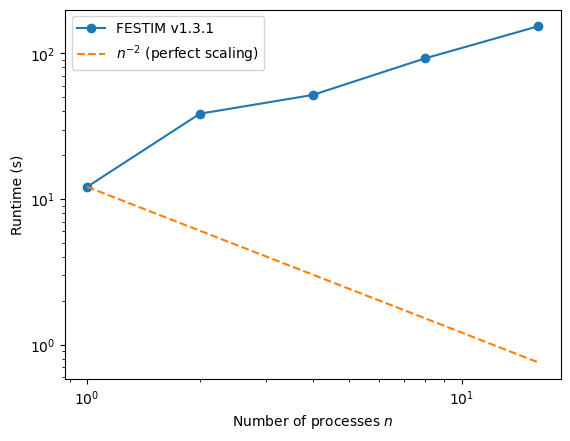

In [5]:
import matplotlib.pyplot as plt
from festim import __version__

plt.plot(num_procs, runtimes, marker="o", label=f"FESTIM v{__version__}")

n = np.linspace(1, 16, 100)
plt.plot(n, runtimes[0] * n**-1, linestyle="--", label="$n^{-2}$ (perfect scaling)")

plt.xlabel("Number of processes $n$")
plt.ylabel("Runtime (s)")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.show()